### 케라스
* 케라스 특징
    - 간결
    - 중복 배제
    - 모듈화
    - 고수준 AI 플랫폼
    - 텐서플로우와 호환
    - 많은 사용자와 오픈 라이브러리

In [101]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [102]:
import tensorflow.keras as keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [41]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

print("x shape:",x_train.shape,"y shape:",y_train.shape)
print("x0:",x_train[0],"y0:",y_train[0])   

x shape: (60000, 28, 28) y shape: (60000,)
x0: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0

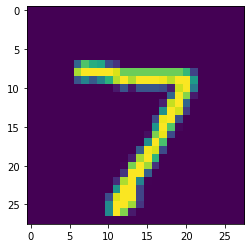

In [45]:
plt.imshow(x_test[0])

### 데이터 핸들링 기획(전처리)
* 입력데이터
    - 2차원 배열->1차원 변환
    - max 256 의 그레이스케일 모델
    - 데이터 표준화
* 원하는 답: 분류 모델 0~9 10진분류 모델 
    - 2진 분류: 시그모이드
    - 다중 분류: 소프트 맥스
        * y_train 데이터가 스칼라 값이므로 one-hot(10) 변환



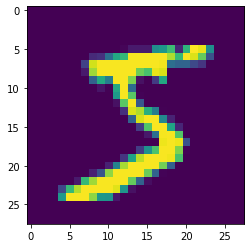

In [47]:
# 데이터 성질을 바꾸지 않고 스케일링
X_train= x_train.reshape(len(x_train),784).astype('float64')/255
X_test= x_test.reshape(len(x_test),784).astype('float64')/255
plt.imshow(X_train[0].reshape(28,28))

In [52]:
# one-hot encoding keras utils 사용=>[0,0,0,0,0,1,0,0,0,0]
no=np.unique(y_train).shape[0]
Y_train=np.eye(no)[y_train]
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [95]:
no=np.unique(y_test).shape[0]
Y_test=np.eye(no)[y_test]
Y_test.shape


(10000, 10)

In [103]:
# 모델 입력~ 출력 레이어 생성
model= Sequential()
model.add(Dense(784,input_dim=784))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 784)               615440    
_________________________________________________________________
dense_56 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_57 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 10)                1290      
Total params: 850,586
Trainable params: 850,586
Non-trainable params: 0
_________________________________________________________________


In [104]:
# 모델 학습 방법 결정
model.compile(loss="categorical_crossentropy",optimizer="Adam", metrics=['accuracy'])

In [105]:
model.fit(X_train,Y_train,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 7s 122us/sample - loss: 0.2542 - accuracy: 0.9236
Epoch 2/5
60000/60000 [==============================] - 7s 121us/sample - loss: 0.1483 - accuracy: 0.9559
Epoch 3/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.1229 - accuracy: 0.9640
Epoch 4/5
60000/60000 [==============================] - 7s 123us/sample - loss: 0.1112 - accuracy: 0.9674
Epoch 5/5
60000/60000 [==============================] - 7s 119us/sample - loss: 0.1023 - accuracy: 0.9690


In [106]:
acc=model.evaluate(X_test,Y_test)
acc

10000/10000 [==============================] - 1s 51us/sample - loss: 0.1076 - accuracy: 0.9702


[0.10763271548577467, 0.9702]